# Examen Python data developer
# Deel 1
## Introductie
Voor dit examen is het belangrijk dat je volgende zaken zeker doet:
 - Maak een Vitual Environment aan & exporteer een `.yml` (of soortgelijke) file aan die je toevoegt aan je codebase.
 - Maak een github pagina aan met een bijhorende `.gitignore` en `readme.md`. Voeg een link naar de github repo toe aan je readme file.
 - Zorg dat je op het einde de tijd neemt om je code op te schonen zodat deze begrijpelijk is voor derden.
 - Wanneer je klaar bent, maak een `.zip` bestand van je volledige codebase aan en laad deze op in de leeromgeving.

In deze opgave bekijken we een gesimuleerde dataset over de geboortes in België van 2019. De data is te vinden in `.csv` bestanden die gelabeld zijn met de echte geboortedag van de personen in het bestand. Laat ons bijvoorbeeld even kijken naar de eerste 5 lijnen van het bestand `2019-1-1.csv`:

<table align="center">
  <tr>
    <th>gemeente</th>
    <th>naam</th>
    <th>geslacht</th>
    <th>verwachte datum</th>
  </tr>
  <tr>
    <td>Hooglede</td>
    <td>Elias</td>
    <td>Mannelijk</td>
    <td>01/14/2019</td>
  </tr>
  <tr>
    <td>Sint-Niklaas (Sint-Niklaas)</td>
    <td>Pauline</td>
    <td>Vrouwelijk</td>
    <td>01/05/2019</td>
  </tr>
  <tr>
    <td>Wijnegem</td>
    <td>Anita</td>
    <td>Vrouwelijk</td>
    <td>01/05/2019</td>
  </tr>
  <tr>
    <td>Grâce-Hollogne</td>
    <td>Jean-Paul</td>
    <td>Mannelijk</td>
    <td>01/13/2019</td>
  </tr>
  <tr>
    <td>Boussu</td>
    <td>François</td>
    <td>Mannelijk</td>
    <td>01/26/2019</td>
  </tr>
</table>


Hier hebben we de kolommen:
 - **gemeente**: De gemeente waar de persoon geboren is.
 - **naam**: De voornaam van de persoon.
 - **geslacht**: Het geslacht van de persoon (Mannelijk of Vrouwelijk).
 - **verwachte datum**: De verwachte geboortedatum van de persoon.

Dus hier hebben we dan bijvoorbeeld op de eerste lijn de mannelijke persoon Elias die geboren is in Hooglede waarvan men verwachtte dat hij zou geboren worden op `01/14/2019` (Amerikaans formaat) maar in feite geboren is op 1 januari 2019.

Doorheen deze opgave gaan we de data van dichterbij inspecteren! Je kan deze opgaves alternatief lezen in de bijgeleverde notebook `examen.ipynb` waar ook de (meeste) afbeeldingen & resultaten zichtbaar zijn.

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy.stats import norm
from scipy.interpolate import interp1d
from datetime import datetime


# Definieer data locaties

loc=os.path.join('..','data')

os.listdir(loc)

['2019-1-1.csv',
 '2019-1-10.csv',
 '2019-1-11.csv',
 '2019-1-12.csv',
 '2019-1-13.csv',
 '2019-1-14.csv',
 '2019-1-15.csv',
 '2019-1-16.csv',
 '2019-1-17.csv',
 '2019-1-18.csv',
 '2019-1-19.csv',
 '2019-1-2.csv',
 '2019-1-20.csv',
 '2019-1-21.csv',
 '2019-1-22.csv',
 '2019-1-23.csv',
 '2019-1-24.csv',
 '2019-1-25.csv',
 '2019-1-26.csv',
 '2019-1-27.csv',
 '2019-1-28.csv',
 '2019-1-29.csv',
 '2019-1-3.csv',
 '2019-1-30.csv',
 '2019-1-31.csv',
 '2019-1-4.csv',
 '2019-1-5.csv',
 '2019-1-6.csv',
 '2019-1-7.csv',
 '2019-1-8.csv',
 '2019-1-9.csv',
 '2019-10-1.csv',
 '2019-10-10.csv',
 '2019-10-11.csv',
 '2019-10-12.csv',
 '2019-10-13.csv',
 '2019-10-14.csv',
 '2019-10-15.csv',
 '2019-10-16.csv',
 '2019-10-17.csv',
 '2019-10-18.csv',
 '2019-10-19.csv',
 '2019-10-2.csv',
 '2019-10-20.csv',
 '2019-10-21.csv',
 '2019-10-22.csv',
 '2019-10-23.csv',
 '2019-10-24.csv',
 '2019-10-25.csv',
 '2019-10-26.csv',
 '2019-10-27.csv',
 '2019-10-28.csv',
 '2019-10-29.csv',
 '2019-10-3.csv',
 '2019-10-30.csv'

## Utilities

In [2]:
def to_percentage(number):
    return str(np.round(number * 100, 2)) + "%"

def compute_num_unique(df, n_births):
    return len(np.unique(df['naam'].sample(n_births)))

## Stap 1: data inlezen

Maak een lus over alle bestanden in de map `data/geboortes`, lees elk `.csv` bestand in en voeg deze samen tot 1 grote DataFrame. Merk op dat de datum verwerkt zit in de filename, voeg deze toe aan de kleine DataFrames voor je de dataframes samenvoegt met een `pd.concat(dfs)`.

Voeg een extra kolom toe met een `"dag van het jaar"` getal, dus 1 januari 2019 is `1`, 2 januari 2019 is `2`, enzovoort.

**Opmerking**: Er is ook data voor 29 februari 2019, terwijl dit geen schrikkeljaar is! Plaats deze geboortes in een afzonderlijke DataFrame `df_wrong`. Zet in `df_wrong` een extra kolom met een referentie naar waarom deze data foutief is.

In [3]:
# Directory containing the CSV files
loc=os.path.join('..','data')

# List maken voor df's
lst = []


# itereren
for filename in os.listdir(loc):
    if filename.endswith('.csv'):
        
        # extractie datum naam
        date_str = filename.split('.')[0]
        
        #filepath vastzetten
        file_path=os.path.join(loc, filename)
        
        #csv inlezen an df maken
        df=pd.read_csv(file_path)
        
        #datum kolom aan toevoegen
        df['datum']=date_str
        
        #kleine dataframes klaar per stuk, nu appenden in de lijst
        lst.append(df)
        
# lijst van df's concatineren to 1 DF

df_total=pd.concat(lst, ignore_index=True)
        
df_total

,gemeente,naam,geslacht,verwachte datum,datum
0,Hooglede,Elias,Mannelijk,01/14/2019,2019-1-1
1,Sint-Niklaas (Sint-Niklaas),Pauline,Vrouwelijk,01/05/2019,2019-1-1
2,Wijnegem,Anita,Vrouwelijk,01/05/2019,2019-1-1
3,Grâce-Hollogne,Jean-Paul,Mannelijk,01/13/2019,2019-1-1
4,Boussu,François,Mannelijk,01/26/2019,2019-1-1
...,...,...,...,...,...
116918,Lede,Lobke,Vrouwelijk,09/12/2019,2019-9-9
116919,Westerlo,Willem,Mannelijk,09/04/2019,2019-9-9
116920,Brugge,Diane,Vrouwelijk,09/20/2019,2019-9-9
116921,Lendelede,Marie-Rose,Vrouwelijk,10/28/2019,2019-9-9


In [4]:
df_total.dtypes

gemeente           object
naam               object
geslacht           object
verwachte datum    object
datum              object
dtype: object

## df_wrong maken en dit verwijderen van main df

In [5]:
#filtreren op vervelende datum:
df_wrong=df_total[df_total['datum'] == '2019-2-29'].copy()

#fout column toevoegen
df_wrong['fout']='29 Februari 2019 bestaat niet (is geen schrikkeljaar)'

#te verwijderen van de main df:
df_total.drop(df_wrong.index, inplace=True)

df_total

,gemeente,naam,geslacht,verwachte datum,datum
0,Hooglede,Elias,Mannelijk,01/14/2019,2019-1-1
1,Sint-Niklaas (Sint-Niklaas),Pauline,Vrouwelijk,01/05/2019,2019-1-1
2,Wijnegem,Anita,Vrouwelijk,01/05/2019,2019-1-1
3,Grâce-Hollogne,Jean-Paul,Mannelijk,01/13/2019,2019-1-1
4,Boussu,François,Mannelijk,01/26/2019,2019-1-1
...,...,...,...,...,...
116918,Lede,Lobke,Vrouwelijk,09/12/2019,2019-9-9
116919,Westerlo,Willem,Mannelijk,09/04/2019,2019-9-9
116920,Brugge,Diane,Vrouwelijk,09/20/2019,2019-9-9
116921,Lendelede,Marie-Rose,Vrouwelijk,10/28/2019,2019-9-9


## dag van jaar toeveoegen

In [6]:
df=df_total.copy()
df.dtypes

gemeente           object
naam               object
geslacht           object
verwachte datum    object
datum              object
dtype: object

In [7]:
df['datum']=pd.to_datetime(df['datum'])

In [8]:
df.dtypes #ok

gemeente                   object
naam                       object
geslacht                   object
verwachte datum            object
datum              datetime64[ns]
dtype: object

In [9]:
df['dag_van_jaar']=df['datum'].dt.dayofyear

In [10]:
df

,gemeente,naam,geslacht,verwachte datum,datum,dag_van_jaar
0,Hooglede,Elias,Mannelijk,01/14/2019,2019-01-01,1
1,Sint-Niklaas (Sint-Niklaas),Pauline,Vrouwelijk,01/05/2019,2019-01-01,1
2,Wijnegem,Anita,Vrouwelijk,01/05/2019,2019-01-01,1
3,Grâce-Hollogne,Jean-Paul,Mannelijk,01/13/2019,2019-01-01,1
4,Boussu,François,Mannelijk,01/26/2019,2019-01-01,1
...,...,...,...,...,...,...
116918,Lede,Lobke,Vrouwelijk,09/12/2019,2019-09-09,252
116919,Westerlo,Willem,Mannelijk,09/04/2019,2019-09-09,252
116920,Brugge,Diane,Vrouwelijk,09/20/2019,2019-09-09,252
116921,Lendelede,Marie-Rose,Vrouwelijk,10/28/2019,2019-09-09,252


In [11]:
#df.to_csv('dataframe_examen.csv', index=False)
###############################################################################################################################

## Stap 2: Dagelijks aantal geboortes bekijken
#### Vraag 1: Maak een plot van het aantal geboortes per dag van het jaar. 

In [12]:
geboortes_per_dag = df.groupby('dag_van_jaar').size()

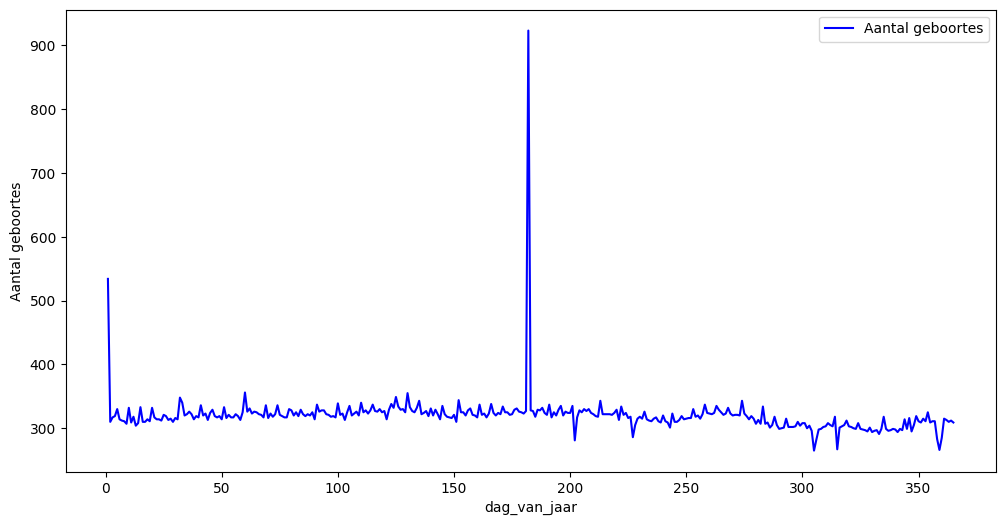

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(geboortes_per_dag, color='blue', label='Aantal geboortes')
plt.xlabel('dag_van_jaar')
plt.ylabel('Aantal geboortes')
plt.legend()
plt.show()

##

#### Vraag 2: Outliers vinden & behandelen

We klassificeren een datum als een outlier als het aantal geboortes meer dan `50%` afwijkt van de gemiddelde waarde overheen de volledige dataset. Zoek alle outliers in de dataset.

In [14]:
# ok, "mean" value van ganse dataset:
mean_geboortes_per_dag=geboortes_per_dag.mean()

In [15]:
# thresholds zoeken: upper en lower (dus 50% deviatie van de mean)

threshold_upper = mean_geboortes_per_dag * 1.5
threshold_lower = mean_geboortes_per_dag * 0.5

#outliers ofwel boven OF onder deze tresh:
outliers = geboortes_per_dag[(geboortes_per_dag > threshold_upper) | (geboortes_per_dag < threshold_lower)]



In [16]:
# ok we hebben de indexen (via outliers.index) nu filtreren uit df:
outlier_dates = df[df['dag_van_jaar'].isin(outliers.index)].copy()
outlier_dates

,gemeente,naam,geslacht,verwachte datum,datum,dag_van_jaar
0,Hooglede,Elias,Mannelijk,01/14/2019,2019-01-01,1
1,Sint-Niklaas (Sint-Niklaas),Pauline,Vrouwelijk,01/05/2019,2019-01-01,1
2,Wijnegem,Anita,Vrouwelijk,01/05/2019,2019-01-01,1
3,Grâce-Hollogne,Jean-Paul,Mannelijk,01/13/2019,2019-01-01,1
4,Boussu,François,Mannelijk,01/26/2019,2019-01-01,1
...,...,...,...,...,...,...
87731,Oostende,Magali,Vrouwelijk,07/15/2019,2019-07-01,182
87732,Rotselaar,Jean,Mannelijk,06/30/2019,2019-07-01,182
87733,Brussel,Lina,Vrouwelijk,07/11/2019,2019-07-01,182
87734,Hamont-Achel,Brenda,Vrouwelijk,06/25/2019,2019-07-01,182


In [17]:
# uiteraard veel duplicaten: verwijderen die handel 
unique_outlier_dates = outlier_dates[['dag_van_jaar', 'datum']].drop_duplicates()
unique_outlier_dates['datum'] #klopt!

0       2019-01-01
86813   2019-07-01
Name: datum, dtype: datetime64[ns]

Ik zal je vertellen; de outliers op 1 januari en 1 juli komen doordat alle geboortes waarvoor de datum niet correct genoteerd is, de datum 1 januari (voor de eerste helft van het jaar) en op 1 juli (voor de tweede helft van het jaar) geplaatst worden. Om dit op te lossen, halen we in de grote geboortes DataFrame (met 1 lijn per geboorte) deze twee datums er volledig uit. Dus we gaan **alle** geboortes van 1 januari en 1 juli verwijderen uit deze dataframe en toevoegen aan de `df_wrong` dataframe met als reden `2019-01-01` en `2019-07-01`.

In [18]:
#wel we hebben de outliers_dates.index dat kunnen we droppen van onze df. Even rekenen: 116850 - 1457 = 115393 moeten we bekomen
df_clean=df.copy()
df_clean=df_clean.drop(outlier_dates.index)
df_clean= df_clean.reset_index(drop=True)

In [19]:
df_clean #aantal rijen kloppen!

,gemeente,naam,geslacht,verwachte datum,datum,dag_van_jaar
0,Merksplas,Liliane,Vrouwelijk,01/04/2019,2019-01-10,10
1,Bornem,Jeroen,Mannelijk,01/10/2019,2019-01-10,10
2,Houthalen-Helchteren,Fatima,Vrouwelijk,01/21/2019,2019-01-10,10
3,Lievegem,Hilaire,Mannelijk,01/15/2019,2019-01-10,10
4,Spiere-Helkijn,Christian,Mannelijk,01/16/2019,2019-01-10,10
...,...,...,...,...,...,...
115388,Lede,Lobke,Vrouwelijk,09/12/2019,2019-09-09,252
115389,Westerlo,Willem,Mannelijk,09/04/2019,2019-09-09,252
115390,Brugge,Diane,Vrouwelijk,09/20/2019,2019-09-09,252
115391,Lendelede,Marie-Rose,Vrouwelijk,10/28/2019,2019-09-09,252


In [20]:
#df_clean.to_csv('df_clean_examen.csv', index=False)

## outlier_dates aan df_wrong toevoegen

In [21]:
#toevoegen aan df_wrong
df_wrong.dtypes

gemeente           object
naam               object
geslacht           object
verwachte datum    object
datum              object
fout               object
dtype: object

In [22]:
outlier_dates.dtypes

gemeente                   object
naam                       object
geslacht                   object
verwachte datum            object
datum              datetime64[ns]
dag_van_jaar                int32
dtype: object

In [24]:
try:
    #omzetten datetime terug naar string anders hebben we een kolom met 2 datatypes na concatinatie
    outlier_dates['datum'] = outlier_dates['datum'].dt.strftime('%Y-%m-%d')
except:
    print('kolom -datum- al in string formaat')

#kolom fout aan toevoegn voor de reden te zetten
outlier_dates['fout']='2019-01-01 en 2019-07-01'

#beide concatten:
df_wrong_total = pd.concat([df_wrong, outlier_dates], ignore_index=True)



kolom -datum- al in string formaat


In [25]:
df_wrong_total

,gemeente,naam,geslacht,verwachte datum,datum,fout,dag_van_jaar
0,Kruisem,Patrick,Mannelijk,02/27/2019,2019-2-29,29 Februari 2019 bestaat niet (is geen schrikk...,NaN
1,Montigny-le-Tilleul,Sarah,Vrouwelijk,03/11/2019,2019-2-29,29 Februari 2019 bestaat niet (is geen schrikk...,NaN
2,Diepenbeek,Valentinus,Mannelijk,03/02/2019,2019-2-29,29 Februari 2019 bestaat niet (is geen schrikk...,NaN
3,Sint-Jans-Molenbeek,El,Mannelijk,02/27/2019,2019-2-29,29 Februari 2019 bestaat niet (is geen schrikk...,NaN
4,Overijse,Apolline,Vrouwelijk,03/03/2019,2019-2-29,29 Februari 2019 bestaat niet (is geen schrikk...,NaN
...,...,...,...,...,...,...,...
1525,Oostende,Magali,Vrouwelijk,07/15/2019,2019-07-01,2019-01-01 en 2019-07-01,182.0
1526,Rotselaar,Jean,Mannelijk,06/30/2019,2019-07-01,2019-01-01 en 2019-07-01,182.0
1527,Brussel,Lina,Vrouwelijk,07/11/2019,2019-07-01,2019-01-01 en 2019-07-01,182.0
1528,Hamont-Achel,Brenda,Vrouwelijk,06/25/2019,2019-07-01,2019-01-01 en 2019-07-01,182.0


In [27]:
#df_wrong.to_csv('df_wrong.csv', index=False)

In [28]:
#####################################################################################################################

## Plot Aantal geboortes per dag met clean df

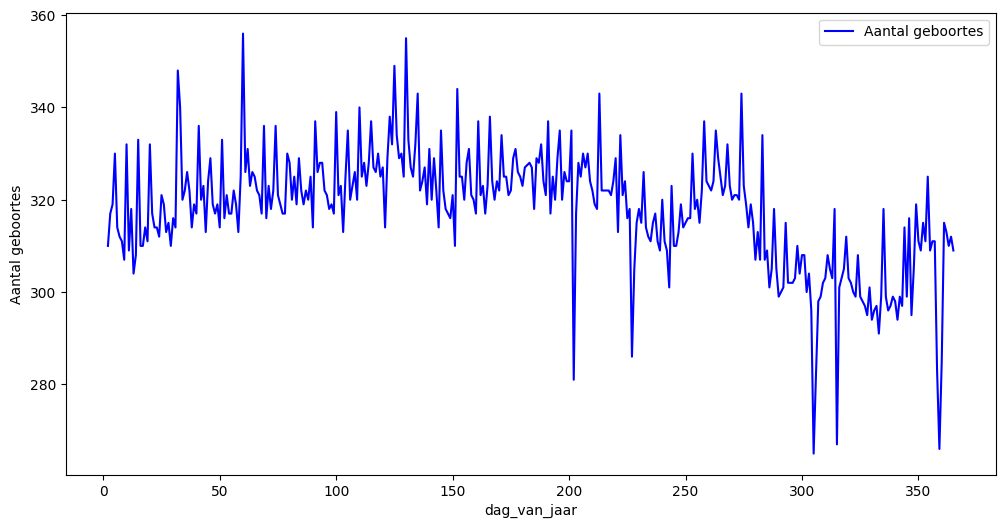

In [29]:
geboortes_per_dag_clean = df_clean.groupby('dag_van_jaar').size()
plt.figure(figsize=(12, 6))
plt.plot(geboortes_per_dag_clean, color='blue', label='Aantal geboortes')
plt.xlabel('dag_van_jaar')
plt.ylabel('Aantal geboortes')
plt.legend()
plt.show()

Maak dezelfde plot nu opnieuw met het aantal geboortes per dag.

 We zien dat er nog steeds redelijk wat uitschieters zijn, kan je code schrijven om de 5 extreme uitschieters in de 2e helft van het jaar identificeren (in totaal 8 datums)?

In [30]:
#aantal geboortes per dag
geboortes_per_dag=df_clean.groupby('dag_van_jaar').size()

#via chaining:
(geboortes_per_dag
    .reset_index(name='Aantal geboortes')
    .sort_values('Aantal geboortes')
    .head(8)
    .sort_values('dag_van_jaar'))

,dag_van_jaar,Aantal geboortes
199,202,281
224,227,286
302,305,265
303,306,282
312,315,267
355,358,283
356,359,266
357,360,285


### Bonusvraag: wekelijkse verbanden

We zien vele pieken en dalen in de evolutie van het aantal geboortes. We willen deze grafiek graag iets "gladder" maken. Kan je hiervoor eens een visualizatie maken van het **gemiddeld** aantal geboortes per week (dit voor elke week, dus maandag-maandag, dinsdag-dinsdag, woensdag-woensdag, ...).

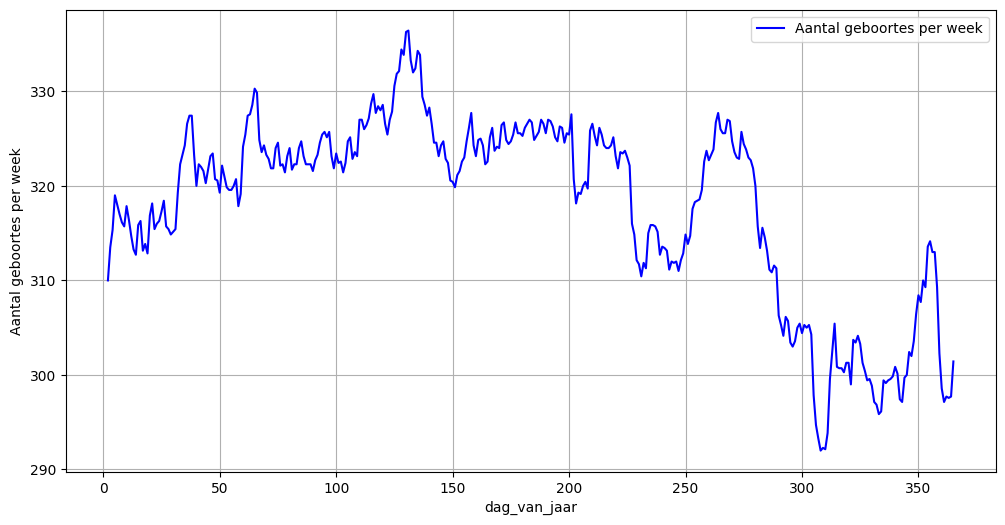

In [31]:
# Rolling windows misschien? (downsampling via resample ('W') met mean() als aggregatie voor geboortes per dag zou in principe ook lukken)
geboortes_per_dag_clean = df_clean.groupby('dag_van_jaar').size()
weekly_rolling_mean = geboortes_per_dag_clean.rolling(window=7, min_periods=1).mean()

# Plot 
plt.figure(figsize=(12, 6))
plt.plot(weekly_rolling_mean.index, weekly_rolling_mean.values, color='blue', label='Aantal geboortes per week')
plt.xlabel('dag_van_jaar')
plt.ylabel('Aantal geboortes per week')
plt.legend()
plt.grid(True)
plt.show()

Dat ziet er al een stuk mooier uit!  We zien ook een aantal duidelijk dips & pieken verschijnen die we eerder niet zagen. We kunnen nu ook even kijken naar het gemiddeld aantal geboortes per dag van de week! Misschien worden er wel gewoon veel minder mensen geboren op zondag dan een andere dag?

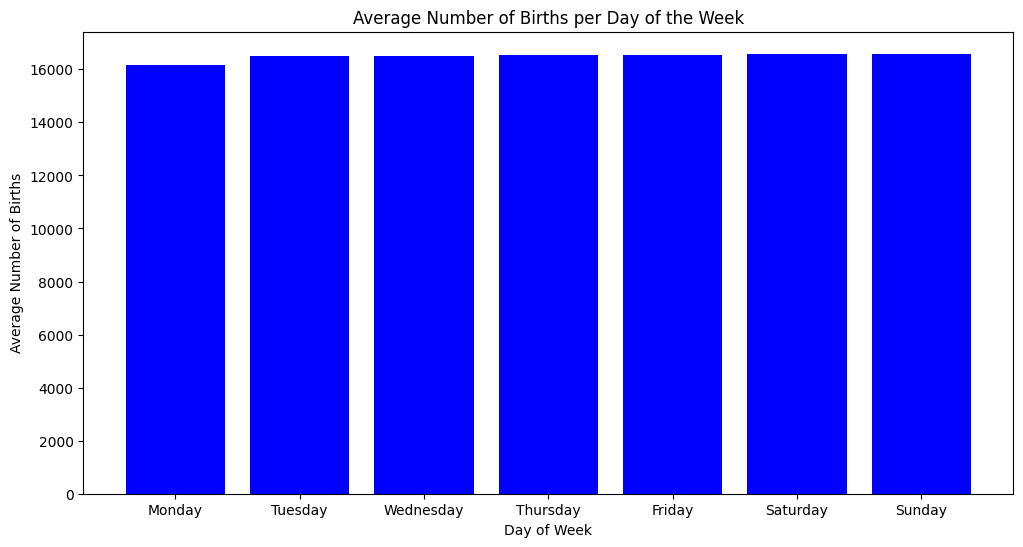

In [32]:
df_clean['datum'] = pd.to_datetime(df_clean['datum'], errors='coerce')

# Extract the day of the week (0=Monday, 6=Sunday)
df_clean['day_of_week'] = df_clean['datum'].dt.dayofweek

# Calculate the mean number of births per day of the week
births_per_day_of_week = df_clean.groupby('day_of_week').size()

# Plot the mean number of births per day of the week
plt.figure(figsize=(12, 6))
plt.bar(births_per_day_of_week.index, births_per_day_of_week.values, color='blue')
plt.xlabel('Day of Week')
plt.ylabel('Average Number of Births')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Average Number of Births per Day of the Week')
plt.show()

## EINDE ....ben  op ...:)